# This is a python program that uses Matplotlib to analyze crytocurrencies

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd

**Download data (show all + Export as CSV)** <br>
Bitcoin: https://www.coindesk.com/price/bitcoin <br>
Ethereum: https://www.coindesk.com/price/ethereum <br>
Litecoin: https://www.coindesk.com/price/litecoin

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving BTC_USD_2019-03-22_2020-09-08-CoinDesk.csv to BTC_USD_2019-03-22_2020-09-08-CoinDesk.csv
Saving ETH_USD_2019-03-22_2020-09-08-CoinDesk.csv to ETH_USD_2019-03-22_2020-09-08-CoinDesk.csv
Saving LTC_USD_2019-03-22_2020-09-08-CoinDesk.csv to LTC_USD_2019-03-22_2020-09-08-CoinDesk.csv


**How to resolve error** <br>
If you bump into this error: TypeError: google.colab._files is undefined, that means you are not running this on Google Chrome.

Simply download Google Chrome and run the code again, it will work.
For more details on this error, read here: https://github.com/googlecolab/colabtools/issues/51

In [ ]:
# Store the data into dataframes
df_btc = pd.read_csv('BTC_USD_2019-03-22_2020-09-08-CoinDesk.csv')
df_eth = pd.read_csv('ETH_USD_2019-03-22_2020-09-08-CoinDesk.csv')
df_ltc = pd.read_csv('LTC_USD_2019-03-22_2020-09-08-CoinDesk.csv')

In [ ]:
# Show the first 5 rows of Bitcoin
df_btc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-03-22,3974.811429,4026.588651,4053.538056,3904.836084
1,BTC,2019-03-23,3987.305225,3974.811248,4002.532316,3957.944316
2,BTC,2019-03-24,3977.707443,3977.276039,4006.984568,3961.802425
3,BTC,2019-03-25,3968.438701,3977.707443,3990.965292,3940.879744
4,BTC,2019-03-26,3913.781717,3972.696582,3982.232764,3903.293930


In [ ]:
# Show the first 5 rows of Ethereum
df_eth.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,ETH,2019-03-22,134.800770,138.559074,139.060397,132.314079
1,ETH,2019-03-23,136.019499,134.791027,136.995373,134.056489
2,ETH,2019-03-24,136.449900,135.709843,137.606598,135.541305
3,ETH,2019-03-25,135.398581,136.449900,136.781789,134.453531
4,ETH,2019-03-26,133.302631,135.398713,136.242951,131.948549


In [ ]:
# Show the first 5 rows of Litecoin
df_ltc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,LTC,2019-03-22,58.379421,60.088747,60.443558,57.231591
1,LTC,2019-03-23,59.181304,58.380271,59.441719,57.889055
2,LTC,2019-03-24,60.401342,59.073363,61.458093,58.843770
3,LTC,2019-03-25,59.389013,60.401342,60.737729,58.634375
4,LTC,2019-03-26,58.642234,59.388854,60.327713,57.904412


In [ ]:
# Create a dataframe that holds the closing price of all 3 cryptocurrencies
df = pd.DataFrame( {'BTC': df_btc['Closing Price (USD)'],
                    'ETH': df_eth['Closing Price (USD)'],
                    'LTC': df_ltc['Closing Price (USD)'] } )

In [ ]:
# Show the new dataframe
df

,BTC,ETH,LTC
0,3974.811429,134.800770,58.379421
1,3987.305225,136.019499,59.181304
2,3977.707443,136.449900,60.401342
3,3968.438701,135.398581,59.389013
4,3913.781717,133.302631,58.642234
...,...,...,...
531,10712.920646,399.557154,52.981079
532,10563.896939,391.871528,51.163764
533,10042.854854,329.084801,46.739710
534,10207.605003,349.460553,47.650095


In [ ]:
# Get statistics on the data
df.describe()

,BTC,ETH,LTC
count,536.000000,536.000000,536.000000
mean,8700.247897,213.566553,64.854881
std,1880.132562,69.397565,24.218259
min,3913.781717,107.898345,32.053195
25%,7396.642155,167.467361,44.873068
50%,8932.581664,197.164665,58.208380
75%,9909.118077,240.607734,75.894903
max,12575.904067,480.555222,139.383189


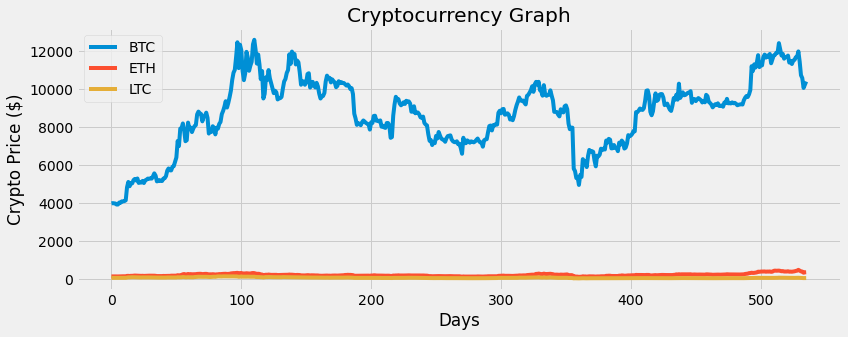

In [ ]:
# Visualize the cryptocurrency closing prices
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

my_crypto = df
plt.figure(figsize = (12.2, 4.5) )   #12.2 inches wide, 4.5 inches high
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label = c)

plt.title('Cryptocurrency Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Price ($)')
plt.legend(my_crypto.columns.values, loc = 'upper left')

plt.show()

In [ ]:
# Scale the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled = min_max_scaler.fit_transform(df)

# Show the scaled data
scaled

array([[ 0.70455842,  7.2190872 , 24.52830319],
       [ 0.84879323,  7.54612504, 25.27542206],
       [ 0.7379915 ,  7.66162046, 26.41213946],
       ...,
       [70.75717578, 59.35391771, 13.683515  ],
       [72.65913631, 64.82161554, 14.53172529],
       [74.6698572 , 66.12125881, 15.49950913]])

In [ ]:
# Convert the scaled data into a dataframe
df_scale = pd.DataFrame(scaled, columns = df.columns)

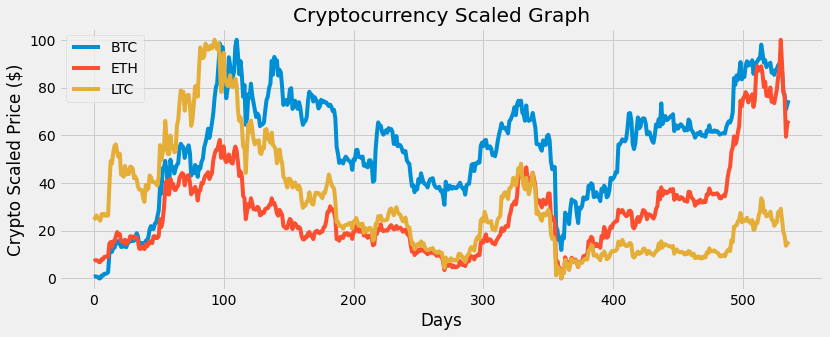

In [ ]:
# Visualize the scaled data
my_crypto = df_scale

plt.figure(figsize = (12.2, 4.5))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label = c)

plt.title('Cryptocurrency Scaled Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled Price')
plt.legend(my_crypto.columns.values, loc = 'upper left')

plt.show()


In [ ]:
# Get the daily simple return
DSR = df.pct_change(1)

# Show the daily simple return
DSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,0.003143,0.009041,0.013736
2,-0.002407,0.003164,0.020615
3,-0.002330,-0.007705,-0.016760
4,-0.013773,-0.015480,-0.012574
...,...,...,...
531,-0.062548,-0.095778,-0.093461
532,-0.013911,-0.019235,-0.034301
533,-0.049323,-0.160223,-0.086468
534,0.016405,0.061916,0.019478


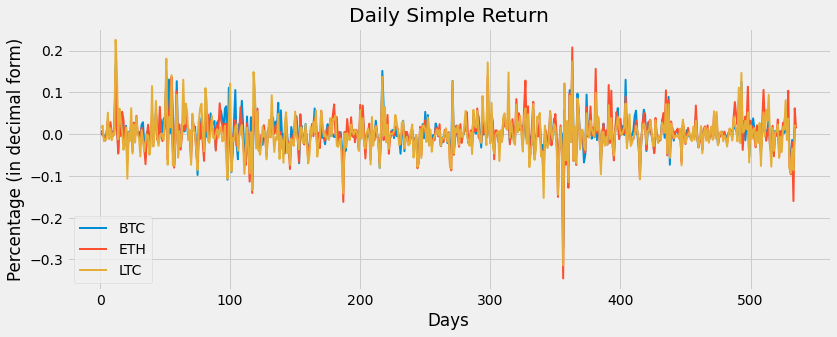

In [ ]:
# Visualize the daily simple return
plt.figure(figsize = (12.2, 4.5))
for c in DSR.columns.values:
  plt.plot(DSR.index, DSR[c], lw = 2)

plt.title('Daily Simple Return')
plt.xlabel('Days')
plt.ylabel('Percentage (in decimal form)')
plt.legend(DSR.columns.values, loc = 'lower left')

plt.show()

In [ ]:
# Get the volatility
print('The cryptocurrency volatility:')
DSR.std()

The cryptocurrency volatility:


BTC    0.038231
ETH    0.045587
LTC    0.048567
dtype: float64

In [ ]:
# Show the average daily simple return (mean)
DSR.mean()

BTC    0.002530
ETH    0.002875
LTC    0.000846
dtype: float64

In [ ]:
# Get the correlation
DSR.corr()

,BTC,ETH,LTC
BTC,1.000000,0.825472,0.783229
ETH,0.825472,1.000000,0.843400
LTC,0.783229,0.843400,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


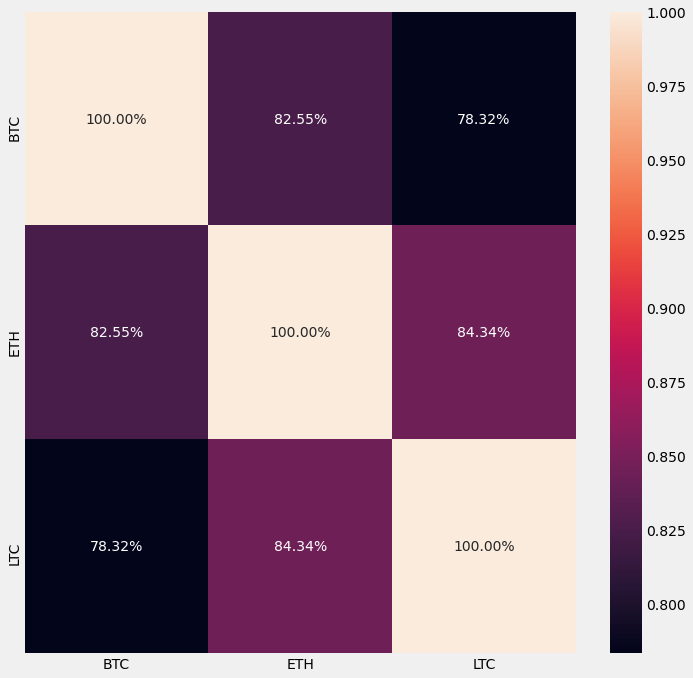

In [ ]:
# Visualize the correlation
import seaborn as sns

sns.heatmap(DSR.corr(), annot = True, fmt = '.2%')

In [ ]:
# Get the daily cumulative simple return
DCSR = (DSR + 1).cumprod()

# Show
DCSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,1.003143,1.009041,1.013736
2,1.000729,1.012234,1.034634
3,0.998397,1.004435,1.017294
4,0.984646,0.988886,1.004502
...,...,...,...
531,2.695202,2.964057,0.907530
532,2.657710,2.907042,0.876401
533,2.526624,2.441268,0.800620
534,2.568073,2.592423,0.816214


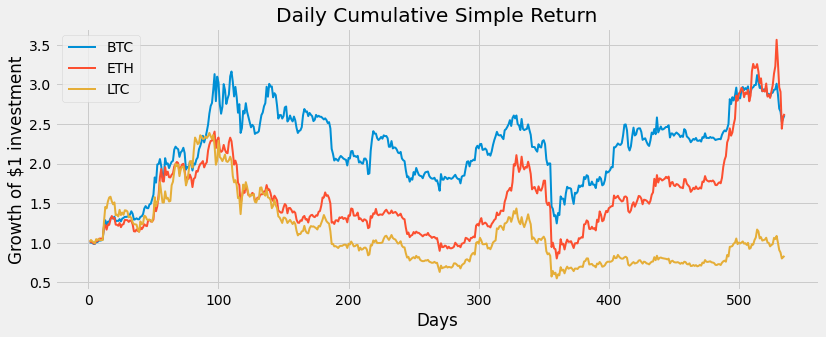

In [ ]:
# Visualize the daily cumulative simple return
plt.figure(figsize = (12.2, 4.5))
for c in DCSR.columns.values:
  plt.plot(DCSR.index, DCSR[c], lw = 2)

plt.title('Daily Cumulative Simple Return')
plt.xlabel('Days')
plt.ylabel('Growth of $1 investment')
plt.legend(DCSR.columns.values, loc = 'upper left')

plt.show()